In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('ggplot')

C:\Users\ARIF\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ARIF\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\ARIF\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
df =pd.read_csv('Reviews.csv')

In [3]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [6]:
df.shape

(568454, 10)

In [7]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


Text(0.5, 0, 'Reviews star')

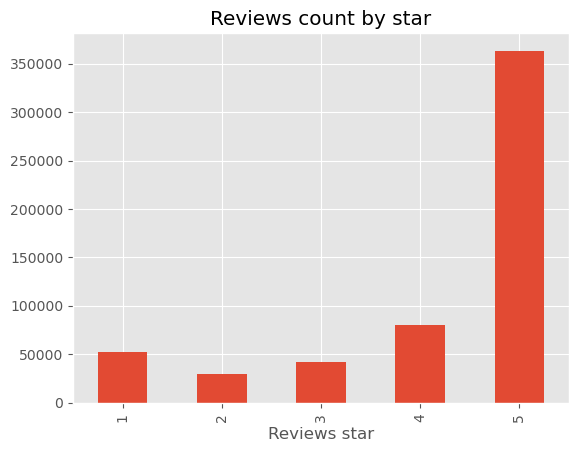

In [8]:
ax=df['Score'].value_counts().sort_index().plot(kind='bar',title='Reviews count by star')
ax.set_xlabel('Reviews star')

In [9]:
#removing the Duplicates if any
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [10]:
#Check for the null values in each column
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [11]:
#Remove the NaN values from the dataset
df.isnull().sum()
df.dropna(how='any',inplace=True)

In [12]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Text(0.5, 1.0, 'Score')

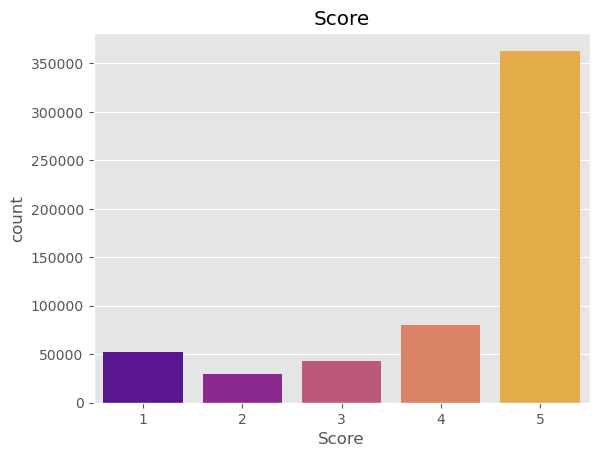

In [13]:
sns.countplot(x=df['Score'], palette="plasma")
plt.title('Score')

In [14]:
df_new = pd.DataFrame(df, columns=['Score', 'Text'])

print(df_new.shape)
df_new.head()

(568411, 2)


,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [15]:
df_new['Score'].astype('category').value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

In [16]:
def polarity(x):
    if x < 3:
        return 0
    else:
        return 1
df_new["Score"] = df_new["Score"].map(polarity)

In [17]:
df_new['Score'].value_counts()

1    486404
0     82007
Name: Score, dtype: int64

<Axes: >

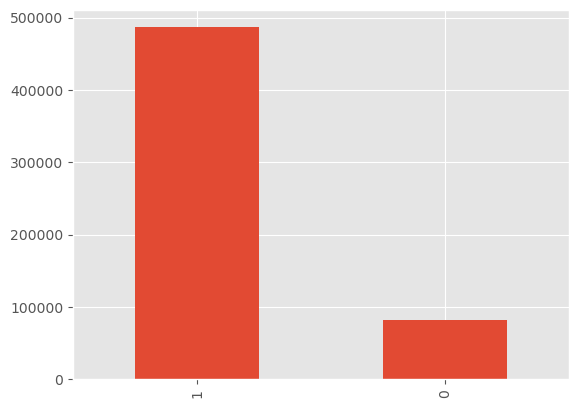

In [18]:
df_new['Score'].value_counts().plot(kind='bar')

In [19]:
df_new['review']=df_new['Text']

In [20]:
df_new['sentiment']=df_new['Score']

In [21]:
df_new.drop(['Score'],axis=1,inplace=True)

In [22]:
df_new.drop(['Text'],axis=1,inplace=True)

In [23]:
df_new.head(2)

,review,sentiment
0,I have bought several of the Vitality canned d...,1
1,Product arrived labeled as Jumbo Salted Peanut...,0


In [24]:
#lowering
df_new['review'] = df_new['review'].str.lower()
df_new.head()

,review,sentiment
0,i have bought several of the vitality canned d...,1
1,product arrived labeled as jumbo salted peanut...,0
2,this is a confection that has been around a fe...,1
3,if you are looking for the secret ingredient i...,0
4,great taffy at a great price. there was a wid...,1


In [25]:
# cleaning punctuations from the sentence
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


In [26]:
df_new['review'] = df_new['review'].apply(lambda text: cleanpunc(text))
df_new.head()

,review,sentiment
0,i have bought several of the vitality canned d...,1
1,product arrived labeled as jumbo salted peanut...,0
2,this is a confection that has been around a fe...,1
3,if you are looking for the secret ingredient i...,0
4,great taffy at a great price there was a wid...,1


In [27]:
#so here no punctuation
df_new['review'][99]

'i fed this to my golden retriever and he hated it   he wouldnt eat it  and when he did  it gave him terrible diarrhea   we will not be buying this again   its also super expensive '

In [28]:
#to remove unnecessary tags
def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext

In [29]:
df_new['review'] = df_new['review'].apply(lambda text : cleanhtml(text))
df_new.head()

,review,sentiment
0,i have bought several of the vitality canned d...,1
1,product arrived labeled as jumbo salted peanut...,0
2,this is a confection that has been around a fe...,1
3,if you are looking for the secret ingredient i...,0
4,great taffy at a great price there was a wid...,1


In [30]:
pos_df=df_new.loc[df_new.sentiment==1,:][:50000]
neg_df=df_new.loc[df_new.sentiment==0,:][:50000]

In [31]:
df=pd.concat([pos_df,neg_df],ignore_index=True)

In [32]:
print(df.shape)
df.head()

(100000, 2)


,review,sentiment
0,i have bought several of the vitality canned d...,1
1,this is a confection that has been around a fe...,1
2,great taffy at a great price there was a wid...,1
3,i got a wild hair for taffy and ordered this f...,1
4,this saltwater taffy had great flavors and was...,1


In [33]:
# shuffling rows
df = df.sample(frac=1).reset_index(drop=True)
print(df.shape)
df.head()

(100000, 2)


,review,sentiment
0,yum i am so happy my mom bought this deliciou...,1
1,altoids are simply the most refreshing thing ...,1
2,perhaps i didnt read the description well enou...,0
3,i did not like them they seemed flavorless co...,0
4,whatever your preference this is excellent ch...,1


In [35]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
port = PorterStemmer()

In [36]:
corpus = []
for i in range(0, len(df)):
    rev = re.sub('[^a-zA-Z0-9]',' ', str(df['review'][i]))
    rev = rev.lower()
    rev = rev.split()

    rev = [port.stem(word) for word in rev if not word in stopwords.words('english')]
    rev = ' '.join(rev)
    corpus.append(rev)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500, binary=True)
X = cv.fit_transform(corpus).toarray()

In [38]:
X.shape

(100000, 2500)

In [39]:
df.head()

,review,sentiment
0,yum i am so happy my mom bought this deliciou...,1
1,altoids are simply the most refreshing thing ...,1
2,perhaps i didnt read the description well enou...,0
3,i did not like them they seemed flavorless co...,0
4,whatever your preference this is excellent ch...,1


In [40]:
y = df['sentiment']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [42]:
X_train, y_train

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 38823    0
 78870    1
 28393    1
 64349    1
 23027    1
         ..
 5695     1
 73542    1
 83281    0
 83467    1
 45919    0
 Name: sentiment, Length: 80000, dtype: int64)

In [43]:
#classification model
from sklearn.naive_bayes import MultinomialNB
senti_model = MultinomialNB().fit(X_train, y_train)

In [44]:
y_pred =senti_model.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score, classification_report
score= accuracy_score(y_test, y_pred)

In [46]:
print(score)

0.83955


In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     10100
           1       0.83      0.85      0.84      9900

    accuracy                           0.84     20000
   macro avg       0.84      0.84      0.84     20000
weighted avg       0.84      0.84      0.84     20000



In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X1 = tv.fit_transform(corpus).toarray()

In [49]:
#Train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.25, random_state=0)

In [50]:
from sklearn.naive_bayes import MultinomialNB
senti_model1 = MultinomialNB().fit(X_train,y_train)

In [51]:
#prediction
y_pred1 = senti_model1.predict(X_test)

In [52]:
score1 = accuracy_score(y_test, y_pred1)
print(score1)

0.8382


In [53]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     12427
           1       0.84      0.84      0.84     12573

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000



Since the dataset is huge so removing stopwords is time consumable
#df['review'] = df['review'].apply(lambda text : remove_stopwords(text))
#df.head()

# Thank you